In [1]:
import os
os.chdir('../')

In [6]:
import pandas as pd
import numpy as np

import DTI.models as models
from DTI.utils import data_process, convert_y_unit, generate_config

In [7]:
# load data
df_Kd = pd.read_csv('../DTBA_data_folder/Kd/data.csv')
#df_Kd = df_Kd.sample(frac = 0.002, replace = False)# toy dataset

X_drug = df_Kd.SMILES.values
X_target = df_Kd['Target Sequence'].values 
# support nM to p (logspace) convertion to help regression
y = convert_y_unit(df_Kd.Kd.values, 'nM', 'p') 

drug_encoding = 'Daylight'
target_encoding = 'Conjoint_triad'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

in total: 66444 drug-target pairs
encoding drug...
unique drugs: 10665
rdkit not found this smiles: Cc1ccc(F)c(NC(=O)Nc2cnn(c2)-c2cccc3nnc(N)c23)c1 convert to all 1 features
rdkit not found this smiles: COc1cc2ncnc(Oc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles: COc1cc2ncnc(Sc3cccc(NC(=O)NC4=CC(=[N](N4)c4ccccc4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
rdkit not found this smiles: COc1cc2ncnc(Sc3cccc(NC(=O)NC4=CC(=[N](C)N4)C(F)(F)F)c3)c2cc1OC convert to all 1 features
drug encoding finished...
encoding protein...
unique target sequence: 1413
protein encoding finished...
splitting dataset...
Done.


In [8]:
# model setup, you can adjust the config file by typing in model parameters. e.g. cls_hidden_dim = [256, 32]
config = generate_config(drug_encoding, target_encoding, train_epoch = 3)
model = models.model_initialize(**config)

--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 35.527576
Training at Epoch 1 iteration 100 with loss 1.9438936
Training at Epoch 1 iteration 200 with loss 1.89679
Training at Epoch 1 iteration 300 with loss 1.314848
Training at Epoch 1 iteration 400 with loss 1.4422063
Training at Epoch 1 iteration 500 with loss 0.91190886
Training at Epoch 1 iteration 600 with loss 2.1998231
Training at Epoch 1 iteration 700 with loss 1.2220495
Validation at Epoch 1 , MSE: 1.1728055551151932 , Pearson Correlation: 0.593522086316641 with p-value: 0.0 , Concordance Index: 0.74363151390629
Training at Epoch 2 iteration 0 with loss 1.1143106
Training at Epoch 2 iteration 100 with loss 1.4813778
Training at Epoch 2 iteration 200 with loss 1.6197817
Training at Epoch 2 iteration 300 with loss 0.8501576
Training at Epoch 2 iteration 400 with loss 0.8082686
Training at Epoch 2 iteration 500 with loss 0.86596614
Training at Epoch 2 iteration 600 with loss 1.3182232
T

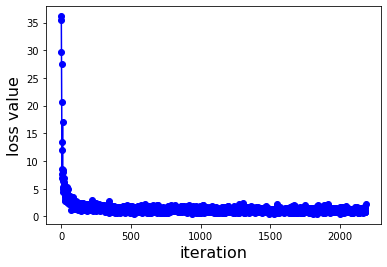

In [9]:
model.train(train, val, test)

In [10]:
test = df_Kd.sample(n = 20, replace=False)
target = test['Target Sequence'].iloc[0]
X_repurpose = test.SMILES.values
drug_name = test.PubChem_ID.astype(int).astype(str).values
target_name = test.UniProt_ID.iloc[0]

In [11]:
r = models.repurpose(X_repurpose, target, model, drug_name, target_name)

repurposing...
in total: 20 drug-target pairs
encoding drug...
unique drugs: 20
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.
predicting...
---------------
Drug Repurposing Result for Q8N568
Drug 74223688   predicted to have binding affinity score 6.36
Drug 91895868   predicted to have binding affinity score 6.30
Drug 44314226   predicted to have binding affinity score 6.17
Drug 44243182   predicted to have binding affinity score 5.90
Drug 53319194   predicted to have binding affinity score 5.73
Drug 447077     predicted to have binding affinity score 5.39
Drug 127048743  predicted to have binding affinity score 5.24
Drug 5494449    predicted to have binding affinity score 5.24
Drug 160355     predicted to have binding affinity score 5.22
Drug 3081361    predicted to have binding affinity score 5.20
Drug 9933475    predicted to have binding affinity score 5.03
Drug 5287969    predicted to have binding aff

In [20]:
target_name

'P36507'

In [8]:
target = test['Target Sequence'].values
target_name = test.UniProt_ID.astype(str).values

In [9]:
r = models.virtual_screening(X_repurpose, target, model, drug_name, target_name)

virtual screening...
in total: 20 drug-target pairs
encoding drug...
unique drugs: 20
drug encoding finished...
encoding protein...
unique target sequence: 20
protein encoding finished...
splitting dataset...
Done.
predicting...
---------------
Virtual Screening Result
Drug 16007391   and target Q8N568  predicted to have binding affinity score 4.87
Drug 447077     and target nan     predicted to have binding affinity score 5.72
Drug 24860417   and target O67648  predicted to have binding affinity score 4.61
Drug 127048743  and target P26281  predicted to have binding affinity score 5.19
Drug 44243182   and target nan     predicted to have binding affinity score 6.28
Drug 53319194   and target P62993  predicted to have binding affinity score 5.89
Drug 9933475    and target P21709  predicted to have binding affinity score 5.52
Drug 53316469   and target P42227  predicted to have binding affinity score 4.83
Drug 123631     and target Q9UKE5  predicted to have binding affinity score 5.39
D